<a href="https://colab.research.google.com/github/Liza-IITP/Book-Recommendation-Based-on-Semantic-Similarity/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import kagglehub
import os

dataset_path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Dataset path:", dataset_path)

os.listdir(dataset_path)


Using Colab cache for faster access to the '7k-books-with-metadata' dataset.
Dataset path: /kaggle/input/7k-books-with-metadata


['books.csv']

In [36]:
import pandas as pd
csv_path = os.path.join(dataset_path, "books.csv")
df = pd.read_csv(csv_path)
df.head()



,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [37]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [38]:
missing_dict = df.isna().sum().to_dict()
missing_dict


{'isbn13': 0,
 'isbn10': 0,
 'title': 0,
 'subtitle': 4429,
 'authors': 72,
 'categories': 99,
 'thumbnail': 329,
 'description': 262,
 'published_year': 6,
 'average_rating': 43,
 'num_pages': 43,
 'ratings_count': 43}

In [39]:
for col, num in df.isna().sum().items():
    missing_dict[col] = num/len(df) * 100

missing_dict

{'isbn13': 0.0,
 'isbn10': 0.0,
 'title': 0.0,
 'subtitle': 65.0367107195301,
 'authors': 1.0572687224669604,
 'categories': 1.4537444933920705,
 'thumbnail': 4.831130690161527,
 'description': 3.847283406754772,
 'published_year': 0.0881057268722467,
 'average_rating': 0.631424375917768,
 'num_pages': 0.631424375917768,
 'ratings_count': 0.631424375917768}

In [40]:
unique_dict = {}

In [41]:
for col,num in df.nunique().items():
    unique_dict[col] = num/len(df) * 100
unique_dict


{'isbn13': 100.0,
 'isbn10': 100.0,
 'title': 93.95007342143906,
 'subtitle': 29.5007342143906,
 'authors': 55.50660792951542,
 'categories': 8.325991189427313,
 'thumbnail': 95.16886930983847,
 'description': 95.06607929515418,
 'published_year': 1.3803230543318648,
 'average_rating': 2.936857562408223,
 'num_pages': 13.43612334801762,
 'ratings_count': 56.98972099853157}

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df.isna()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,False,False,False,False,False,False,False,False,False,False,False,False
6806,False,False,False,True,False,False,False,True,False,False,False,False
6807,False,False,False,True,False,False,True,True,False,False,False,False
6808,False,False,False,True,False,False,False,False,False,False,False,False


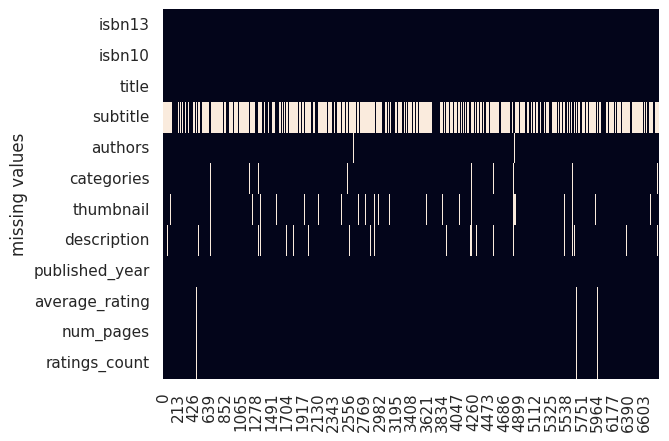

In [44]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False, ax=ax)
plt.ylabel("missing values")
plt.show()
# Roughly , 2/3rd subtitles are missing - probably,will be removing it.
# There are a very few books with missing numpages but has also missing rating count and average rating , we can delete this particular data rows if not biased.
# Quite a few books are having missing authors , categories ,thumbnails and description .

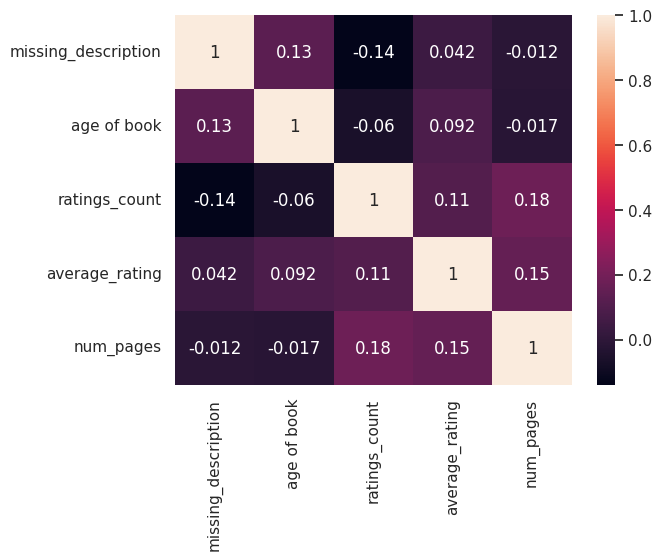

In [45]:
import numpy as np
df["missing_description"] = np.where(df["description"].isna(), 1, 0)
df["age of book"] = 2025 - df["published_year"]
# to check the correlation between the columns with missing values
columns_of_interest = ["missing_description", "age of book", "ratings_count", "average_rating","num_pages"]
corr_matrix = df[columns_of_interest].corr(method="spearman")
sns.set_theme(style="white")
ax = plt.axes()
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

In [46]:
# since not much correlated , we can directly remove the rows once we confirm they are not too many(not more than 5%)
len(df[df["average_rating"].isna()|df['num_pages'].isna()|df["published_year"].isna()|df["description"].isna()]) #303


303

In [47]:
df = df[~df["average_rating"].isna()&~df['num_pages'].isna()&~df["published_year"].isna()&~df["description"].isna()]
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age of book
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
mean,9.780668e+12,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502
std,5.868404e+08,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000
25%,9.780317e+12,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000
50%,9.780552e+12,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000
75%,9.780807e+12,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000


In [48]:
df.isna().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4226
authors,63
categories,33
thumbnail,214
description,0
published_year,0
average_rating,0


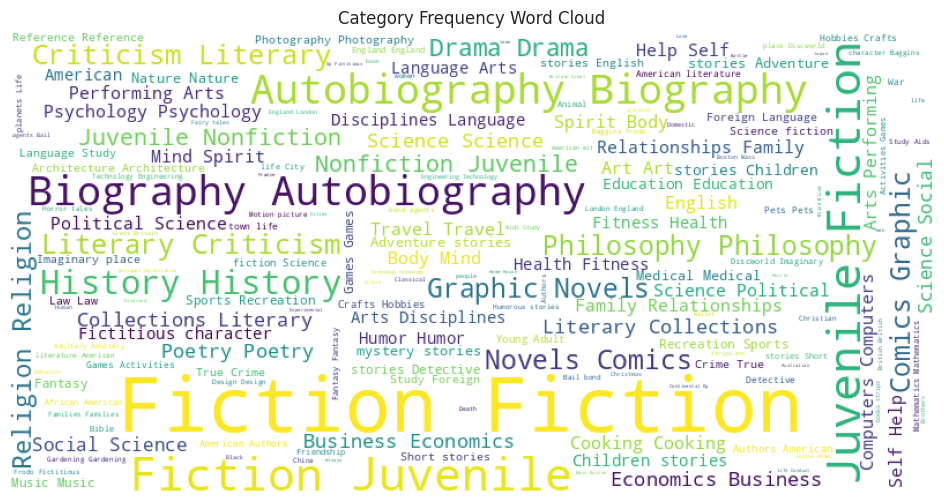

In [49]:
from wordcloud import WordCloud

text = " ".join(
    cat for cat, cnt in df["categories"].value_counts().items()
    for _ in range(cnt)
)

wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Category Frequency Word Cloud")
plt.show()


In [50]:
category_table = (
    df["categories"]
    .value_counts()
    .to_frame("count")
    .assign(percentage=lambda x: 100 * x["count"] / x["count"].sum())
)

category_table.head(30)


,count,percentage
categories,,
Fiction,2523,38.971270
Juvenile Fiction,534,8.248378
Biography & Autobiography,391,6.039543
History,258,3.985171
Literary Criticism,164,2.533210
Philosophy,154,2.378746
Comics & Graphic Novels,152,2.347853
Religion,136,2.100711
Drama,126,1.946247


In [51]:
df["words_description"] = df["description"].str.split().str.len()
df["words_description"].describe()

,words_description
count,6507.000000
mean,66.325803
std,66.120291
min,1.000000
25%,27.000000
50%,40.000000
75%,82.000000
max,920.000000


In [52]:
df = df[df["words_description"] >= 25]

In [53]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age of book,words_description
count,5.197000e+03,5197.000000,5197.000000,5197.000000,5.197000e+03,5197.0,5197.000000,5197.000000
mean,9.780667e+12,1999.804118,3.922246,348.472195,2.113112e+04,0.0,25.195882,78.774485
std,5.951053e+08,9.082979,0.324975,229.891672,1.446480e+05,0.0,9.082979,68.532750
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000,25.000000
25%,9.780313e+12,1998.000000,3.750000,213.000000,1.830000e+02,0.0,20.000000,35.000000
50%,9.780521e+12,2002.000000,3.940000,312.000000,1.125000e+03,0.0,23.000000,47.000000
75%,9.780807e+12,2005.000000,4.120000,416.000000,6.574000e+03,0.0,27.000000,105.000000
max,9.789028e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000,920.000000


Since most subtitles are missing, we conditionally concatenate them only when present. This avoids introducing noise tokens like ‘nan’ and preserves semantic information while maintaining a consistent text feature.

In [54]:
df["titles_subtitles"] = np.where(
    df["subtitle"].isna(),
    df["title"],
    df["title"] + ": " + df["subtitle"]
)


In [55]:
# df.describe()
df["titles_subtitles"].str.len().describe()


,titles_subtitles
count,5197.000000
mean,33.087743
std,25.121904
min,2.000000
25%,16.000000
50%,24.000000
75%,45.000000
max,252.000000


In [56]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_description', 'age of book',
       'words_description', 'titles_subtitles'],
      dtype='object')

In [57]:
df["tagged_description"] = df[["isbn13","description"]].astype(str).agg(" ".join,axis = 1)
df["tagged_description"][0]

'9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the wors

In [58]:
(
    df.drop(["subtitle","missing_description","words_description","age of book"],axis=1)
    .to_csv("books_cleaned.csv", index = False)
)